In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/PINN

/content/drive/.shortcut-targets-by-id/1kBpsdlzoY9Dl5Og9N1a-GxSNoIkIrQV4/PINN


In [ ]:
!pip install -q git+https://github.com/RobertJaro/NF2.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 31.7 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [ ]:
series_base_path = Path('ar_series_377_2011-02-12T00:00:00')
energy_path = series_base_path / 'eval_energy'

In [ ]:
energy_files = [x for x in energy_path.glob('**/*.npy')]
energy_files = sorted(energy_files)

In [ ]:
energy_series_dates = [datetime.strptime(os.path.basename(f), '%Y%m%d_%H%M%S_TAI.npy') for f in energy_files]

In [ ]:
energy_density = np.array([np.load(f) for f in energy_files])

In [ ]:
df = pd.DataFrame({"date":energy_series_dates, "energy_density":energy_density})

In [ ]:
csv_path = series_base_path / 'mine.csv'
df.to_csv(csv_path, index=False)

In [ ]:
df_mine = pd.read_csv(csv_path, index_col=False)
bin = 2
cm_per_pixel = 360e5 * bin
dV = cm_per_pixel**3
energy_mine = (df_mine['energy_density']*dV)/1e33
date_mine = df_mine['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [ ]:
csv01 = Path('./author/series_01.csv')
df01 = pd.read_csv(csv01, index_col=False)
energy_01 = df01[' E (10^33 erg)']
date_01 = df01['TIME (10^9 sec since 1-jan-1979 )'].map(lambda x: datetime(1979, 1, 1) + timedelta(seconds=x*1e9))

In [ ]:
csv1 = Path('./author/series_1.csv')
df1 = pd.read_csv(csv1, index_col=False)
energy_1 = df1[' E (10^33 erg)']
date_1 = df1['TIME (10^9 sec since 1-jan-1979 )'].map(lambda x: datetime(1979, 1, 1) + timedelta(seconds=x*1e9))

In [ ]:
csvwb1 = Path('./author/series_wb1.csv')
dfwb1 = pd.read_csv(csvwb1, index_col=False)
energy_wb1 = dfwb1[' E (10^33 erg)']
date_wb1 = dfwb1['TIME (10^9 sec since 1-jan-1979 )'].map(lambda x: datetime(1979, 1, 1) + timedelta(seconds=x*1e9))

In [ ]:
csvwb2 = Path('./author/series_wb2.csv')
dfwb2 = pd.read_csv(csvwb2, index_col=False)
energy_wb2 = dfwb2[' E (10^33 erg)']
date_wb2 = dfwb2['TIME (10^9 sec since 1-jan-1979 )'].map(lambda x: datetime(1979, 1, 1) + timedelta(seconds=x*1e9))

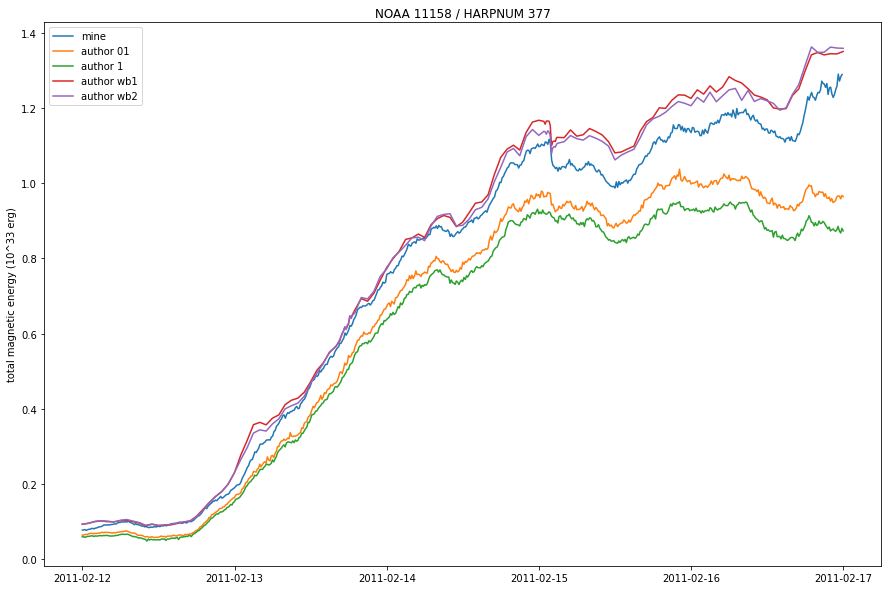

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(date_mine, energy_mine, label='mine')
plt.plot(date_01, energy_01, label='author 01')
plt.plot(date_1, energy_1, label='author 1')
plt.plot(date_wb1, energy_wb1, label='author wb1')
plt.plot(date_wb2, energy_wb2, label='author wb2')
plt.title('NOAA 11158 / HARPNUM 377')
plt.ylabel('total magnetic energy (10^33 erg)')
# figure_energy_path = os.path.join(series_base_path, './energy.png')
# plt.savefig(figure_energy_path, dpi=300)
plt.legend()
plt.show()

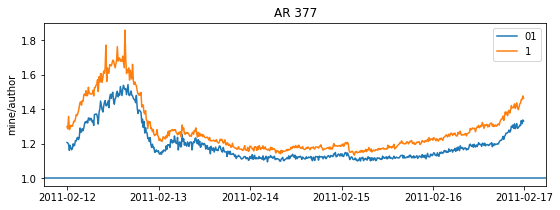

In [ ]:
plt.figure(figsize=(9, 3))
plt.plot(date_01, energy_mine/energy_01, label='01')
plt.plot(date_1, energy_mine/energy_1, label='1')
plt.axhline(1)
plt.title('AR 377')
plt.ylabel('mine/author')
# figure_energy_path = os.path.join(series_base_path, './energy.png')
# plt.savefig(figure_energy_path, dpi=300)
plt.legend()
plt.show()